## **04. Exploratory Data Analysis (EDA)**

---
Memahami Struktur Data:

Loading Data: Memuat data dari sumbernya, misalnya file CSV, database, atau API Twitter.
Melihat Sekilas Data: Menampilkan beberapa baris pertama data untuk mendapatkan gambaran umum.
Informasi Data: Menggunakan fungsi seperti .info() untuk melihat tipe data, jumlah nilai non-null, dan lain-lain.

Analisis Statistik Deskriptif:

Frekuensi Kata: Menghitung frekuensi kata untuk mengidentifikasi kata-kata yang paling sering muncul.
Distribusi Panjang Tweet: Menganalisis panjang tweet untuk memahami pola distribusi panjang teks.
Word Cloud: Membuat visualisasi awan kata untuk melihat kata-kata yang paling menonjol.
Visualisasi Data:

Histogram: Menampilkan distribusi frekuensi dari berbagai fitur, seperti jumlah kata per tweet.
Box Plot: Mengidentifikasi outliers dan memahami distribusi data.
Pie Chart: Menampilkan proporsi dari kategori tertentu, seperti sentimen positif, negatif, dan netral.
Analisis Teks:

Sentiment Analysis: Menggunakan alat atau pustaka untuk menentukan sentimen dari tweet.
Topic Modeling: Mengidentifikasi topik utama yang ada di dalam kumpulan tweet.
N-gram Analysis: Menganalisis pasangan kata (bigram, trigram) yang sering muncul bersama.
Analisis Korelasi:

Mencari Pola: Menganalisis korelasi antara berbagai fitur dalam data, seperti hubungan antara panjang tweet dan jumlah retweet.
Heatmap: Menggunakan peta panas untuk visualisasi korelasi antara berbagai fitur.
Kesimpulan dan Hipotesis:

Merangkum Temuan: Menyusun temuan utama dari EDA dan bagaimana temuan tersebut dapat mempengaruhi langkah selanjutnya.
Membuat Hipotesis: Mengembangkan hipotesis berdasarkan analisis awal untuk pengujian lebih lanjut.


## Import Library

In [264]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import sys

Loading Data

In [265]:
data = pd.read_csv(
    '../03. Integrasi Data (Data Integration)/Dataset_Integration.csv', 
    sep="\t"
)

## A. Data Structure

In [266]:
data

,tweet,label
0,pengabdian yang terpuji meskipun terlihat biasa,Neutral
1,baru saja mengirim foto,Neutral
2,apa kabar dunia twitter ? masihkah selucu dan ...,Neutral
3,yah gimana sih yang yaudah susul aku dulu kita...,Neutral
4,saja ka dorg suro beli medium 2 set,Neutral
...,...,...
28710,"Aku pengen bnget nih,daerah jakarta barat ada ...",Neutral
28711,Selamat Hari Raya Tri Suci Waisak untuk seluru...,Joy
28712,Kandungan serat di passion fruit atau markisa ...,Love
28713,Selamat memperingati Hari Kebangkitan Nasional...,Joy


In [267]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28715 entries, 0 to 28714
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   28715 non-null  object
 1   label   28700 non-null  object
dtypes: object(2)
memory usage: 448.8+ KB
None


## C. Label Proportion

In [268]:
print(data['label'].value_counts())

label
Joy        6638
Anger      5757
Sad        4857
Love       4411
Neutral    3550
Fear       3487
Name: count, dtype: int64


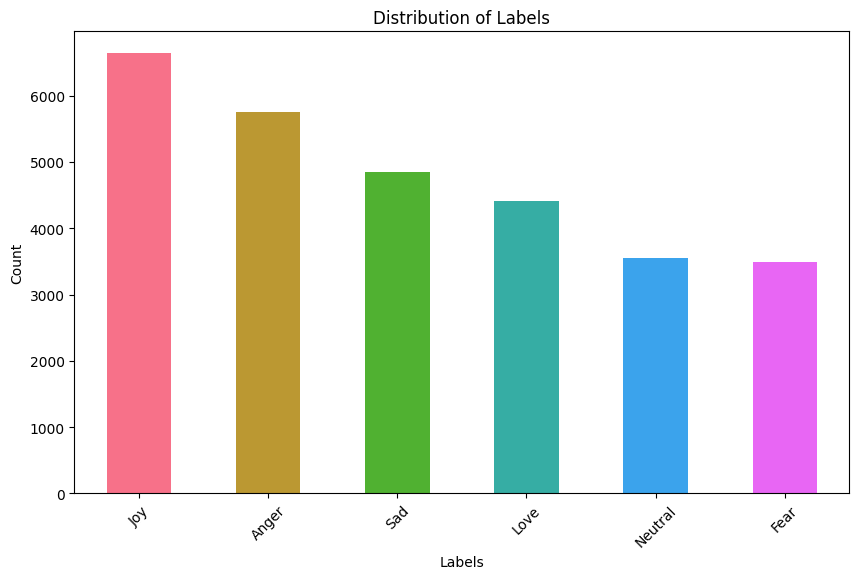

In [269]:
label_counts = data["label"].value_counts()

# Generate a color palette with a unique color for each label
palette = sns.color_palette("husl", len(label_counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=palette)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## D. Character Analysis Tweet

### 1. Karakter

In [270]:
data['Length'] = data['tweet'].str.len()
data

,tweet,label,Length
0,pengabdian yang terpuji meskipun terlihat biasa,Neutral,47
1,baru saja mengirim foto,Neutral,23
2,apa kabar dunia twitter ? masihkah selucu dan ...,Neutral,61
3,yah gimana sih yang yaudah susul aku dulu kita...,Neutral,76
4,saja ka dorg suro beli medium 2 set,Neutral,35
...,...,...,...
28710,"Aku pengen bnget nih,daerah jakarta barat ada ...",Neutral,51
28711,Selamat Hari Raya Tri Suci Waisak untuk seluru...,Joy,336
28712,Kandungan serat di passion fruit atau markisa ...,Love,634
28713,Selamat memperingati Hari Kebangkitan Nasional...,Joy,329


In [271]:
print(f"Rata-rata panjang karakter tweet : {data['Length'].mean():.2f}")

Rata-rata panjang karakter tweet : 143.26


In [272]:
print(f"Jumlah panjang karakter tweet  : {data['Length'].sum():.2f}")

Jumlah panjang karakter tweet  : 4113785.00


### 2. Kata

In [273]:
# Define the word count function
def word_count(tweet):
    tweet_list = tweet.split()
    return len(tweet_list)

# Apply the word count function to the 'tweet' column
data['Word_count'] = data['tweet'].apply(word_count)


In [274]:
# Drop rows where Word_count is greater than 30
#data = data[data['Word_count'] <= 35]

In [275]:
# Print jumlah kata and rata-rata jumlah kata
print(f"Jumlah kata : {data['Word_count'].sum():.2f}")
print(f"Rata-rata jumlah kata : {data['Word_count'].mean():.2f}")



Jumlah kata : 636462.00
Rata-rata jumlah kata : 22.16


In [276]:
data

,tweet,label,Length,Word_count
0,pengabdian yang terpuji meskipun terlihat biasa,Neutral,47,6
1,baru saja mengirim foto,Neutral,23,4
2,apa kabar dunia twitter ? masihkah selucu dan ...,Neutral,61,11
3,yah gimana sih yang yaudah susul aku dulu kita...,Neutral,76,14
4,saja ka dorg suro beli medium 2 set,Neutral,35,8
...,...,...,...,...
28710,"Aku pengen bnget nih,daerah jakarta barat ada ...",Neutral,51,9
28711,Selamat Hari Raya Tri Suci Waisak untuk seluru...,Joy,336,22
28712,Kandungan serat di passion fruit atau markisa ...,Love,634,59
28713,Selamat memperingati Hari Kebangkitan Nasional...,Joy,329,33
